In [3]:
# dataset : https://www.kaggle.com/datasets/spandanpatnaik09/face-mask-detectormask-not-mask-incorrect-mask/
# mask, no mask, and incorrect mask detection

# dataset check
import os
print(len(os.listdir('data/dataset_mask/with_mask')))
print(len(os.listdir('data/dataset_mask/without_mask')))
print(len(os.listdir('data/dataset_mask/incorrect_mask')))

690
686
703


In [4]:
# train test split
import os
import shutil

train_size = 550
test_size = 130

# create directories
os.makedirs('data/dataset_mask/train/with_mask')
os.makedirs('data/dataset_mask/train/without_mask')
os.makedirs('data/dataset_mask/train/incorrect_mask')

os.makedirs('data/dataset_mask/test/with_mask')
os.makedirs('data/dataset_mask/test/without_mask')
os.makedirs('data/dataset_mask/test/incorrect_mask')

# move files
for i, file in enumerate(os.listdir('data/dataset_mask/with_mask')):
    if i < train_size:
        shutil.move(f'data/dataset_mask/with_mask/{file}', 'data/dataset_mask/train/with_mask')
    else:
        shutil.move(f'data/dataset_mask/with_mask/{file}', 'data/dataset_mask/test/with_mask')

for i, file in enumerate(os.listdir('data/dataset_mask/without_mask')):
    if i < train_size:
        shutil.move(f'data/dataset_mask/without_mask/{file}', 'data/dataset_mask/train/without_mask')
    else:
        shutil.move(f'data/dataset_mask/without_mask/{file}', 'data/dataset_mask/test/without_mask')

for i, file in enumerate(os.listdir('data/dataset_mask/incorrect_mask')):
    if i < train_size:
        shutil.move(f'data/dataset_mask/incorrect_mask/{file}', 'data/dataset_mask/train/incorrect_mask')
    else:
        shutil.move(f'data/dataset_mask/incorrect_mask/{file}', 'data/dataset_mask/test/incorrect_mask')

In [5]:
# check again the dataset

print(len(os.listdir('data/dataset_mask/train/with_mask')))
print(len(os.listdir('data/dataset_mask/train/without_mask')))
print(len(os.listdir('data/dataset_mask/train/incorrect_mask')))

print(len(os.listdir('data/dataset_mask/test/with_mask')))
print(len(os.listdir('data/dataset_mask/test/without_mask')))
print(len(os.listdir('data/dataset_mask/test/incorrect_mask')))

550
550
550
140
136
153


training images



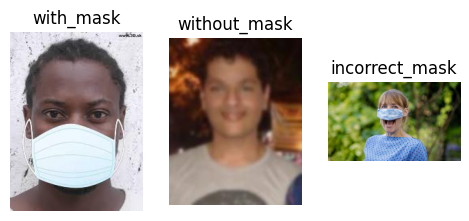

testing images



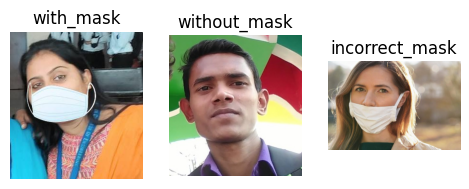

In [8]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

train_dir = 'data/dataset_mask/train'
test_dir = 'data/dataset_mask/test'

print('training images\n')
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img(train_dir +'/'+ expression +'/'+ os.listdir(train_dir +'/'+ expression)[5])
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

print('testing images\n')
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(test_dir):
    img = load_img(test_dir +'/'+ expression +'/'+ os.listdir(test_dir +'/'+ expression)[5])
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [9]:
# datagenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=[0.4,1.5],
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                shuffle=True,
                                                color_mode='rgb',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                shuffle=True,
                                                color_mode='rgb',
                                                class_mode='categorical')

Found 1650 images belonging to 3 classes.
Found 429 images belonging to 3 classes.


In [23]:
# vgg16 modelling initialization
from tensorflow.keras.applications import VGG16

vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [24]:
for layer in vgg.layers:
    layer.trainable = False

In [26]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

vgg16_model = Sequential()
vgg16_model.add(vgg)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(3, activation='softmax'))

vgg16_model.build(input_shape=(None, 224, 224, 3))

vgg16_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
from keras.utils import plot_model

plot_model(vgg16_model, to_file='vgg16_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [33]:
# training
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

val_steps = test_set.n // test_set.batch_size
steps_per_epoch = training_set.n // training_set.batch_size

checkpoint = ModelCheckpoint("vgg16.keras",monitor = "val_accuracy",save_best_only = True,verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=8,verbose=1)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
vgg16_model.compile(optimizer=sgd,loss = "categorical_crossentropy",metrics = ["accuracy"])

history = vgg16_model.fit(x=training_set,
                 validation_data=test_set,
                 epochs=25,
                 callbacks=[checkpoint,earlystop],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=val_steps)

Epoch 1/25


/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4712 - loss: 23.7955
Epoch 1: val_accuracy improved from -inf to 0.90385, saving model to vgg16.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 484s 9s/step - accuracy: 0.4732 - loss: 23.6465 - val_accuracy: 0.9038 - val_loss: 0.7329
Epoch 2/25
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:46 7s/step - accuracy: 0.8438 - loss: 1.5927

2024-05-27 21:25:30.309737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/aliif/.pyenv/versions/3.12.1/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy improved from 0.90385 to 0.92308, saving model to vgg16.keras


2024-05-27 21:25:33.109942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.8438 - loss: 1.5927 - val_accuracy: 0.9231 - val_loss: 0.6900
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8349 - loss: 2.4996
Epoch 3: val_accuracy did not improve from 0.92308
51/51 ━━━━━━━━━━━━━━━━━━━━ 516s 10s/step - accuracy: 0.8349 - loss: 2.4945 - val_accuracy: 0.8846 - val_loss: 1.4901
Epoch 4/25
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:38 7s/step - accuracy: 0.7812 - loss: 3.6346

2024-05-27 21:34:15.902572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_accuracy did not improve from 0.92308
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.7812 - loss: 3.6346 - val_accuracy: 0.8462 - val_loss: 0.6294
Epoch 5/25


2024-05-27 21:34:18.602331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8372 - loss: 1.9153
Epoch 5: val_accuracy improved from 0.92308 to 0.97596, saving model to vgg16.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 552s 11s/step - accuracy: 0.8372 - loss: 1.9162 - val_accuracy: 0.9760 - val_loss: 0.2460
Epoch 6/25
 1/51 ━━━━━━━━━━━━━━━━━━━━ 7:01 8s/step - accuracy: 0.9062 - loss: 0.6533

2024-05-27 21:43:39.352334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_accuracy did not improve from 0.97596
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9062 - loss: 0.6533 - val_accuracy: 0.8462 - val_loss: 1.9335
Epoch 7/25


2024-05-27 21:43:42.896680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8907 - loss: 0.8844
Epoch 7: val_accuracy did not improve from 0.97596
51/51 ━━━━━━━━━━━━━━━━━━━━ 569s 11s/step - accuracy: 0.8906 - loss: 0.8848 - val_accuracy: 0.9760 - val_loss: 0.2005
Epoch 8/25
 1/51 ━━━━━━━━━━━━━━━━━━━━ 7:27 9s/step - accuracy: 0.9688 - loss: 0.2588

2024-05-27 21:53:20.640807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_accuracy did not improve from 0.97596
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9688 - loss: 0.2588 - val_accuracy: 0.8462 - val_loss: 1.5678
Epoch 9/25


2024-05-27 21:53:24.148952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8820 - loss: 1.2774 
Epoch 9: val_accuracy did not improve from 0.97596
51/51 ━━━━━━━━━━━━━━━━━━━━ 613s 12s/step - accuracy: 0.8820 - loss: 1.2757 - val_accuracy: 0.9327 - val_loss: 0.7826
Epoch 10/25
 1/51 ━━━━━━━━━━━━━━━━━━━━ 6:22 8s/step - accuracy: 0.9062 - loss: 0.7466

2024-05-27 22:03:44.812363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_accuracy improved from 0.97596 to 1.00000, saving model to vgg16.keras


2024-05-27 22:03:47.841604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9062 - loss: 0.7466 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 11/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8970 - loss: 1.2345
Epoch 11: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 550s 11s/step - accuracy: 0.8969 - loss: 1.2341 - val_accuracy: 0.9712 - val_loss: 0.2601
Epoch 12/25
 1/51 ━━━━━━━━━━━━━━━━━━━━ 6:46 8s/step - accuracy: 0.9688 - loss: 0.2469

2024-05-27 22:13:05.841348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 12: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.9688 - loss: 0.2469 - val_accuracy: 1.0000 - val_loss: 9.1699e-09
Epoch 13/25


2024-05-27 22:13:09.405575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8967 - loss: 1.0312
Epoch 13: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 544s 11s/step - accuracy: 0.8965 - loss: 1.0331 - val_accuracy: 0.9447 - val_loss: 0.5654
Epoch 14/25
 1/51 ━━━━━━━━━━━━━━━━━━━━ 6:59 8s/step - accuracy: 0.9688 - loss: 0.0361

2024-05-27 22:22:21.700768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 14: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.9688 - loss: 0.0361 - val_accuracy: 1.0000 - val_loss: 3.5120e-06
Epoch 15/25


2024-05-27 22:22:25.379194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9113 - loss: 0.7644
Epoch 15: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 537s 10s/step - accuracy: 0.9113 - loss: 0.7644 - val_accuracy: 0.9712 - val_loss: 0.1842
Epoch 16/25
 1/51 ━━━━━━━━━━━━━━━━━━━━ 5:54 7s/step - accuracy: 0.9375 - loss: 0.8314

2024-05-27 22:31:29.112960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 16: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9375 - loss: 0.8314 - val_accuracy: 0.9231 - val_loss: 2.6674
Epoch 17/25


2024-05-27 22:31:32.163936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9004 - loss: 0.7901
Epoch 17: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 541s 11s/step - accuracy: 0.9005 - loss: 0.7892 - val_accuracy: 0.9688 - val_loss: 0.3113
Epoch 18/25
 1/51 ━━━━━━━━━━━━━━━━━━━━ 7:33 9s/step - accuracy: 0.9375 - loss: 0.5032

2024-05-27 22:40:42.321139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 18: val_accuracy did not improve from 1.00000
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.9375 - loss: 0.5032 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 18: early stopping


2024-05-27 22:40:46.400956: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


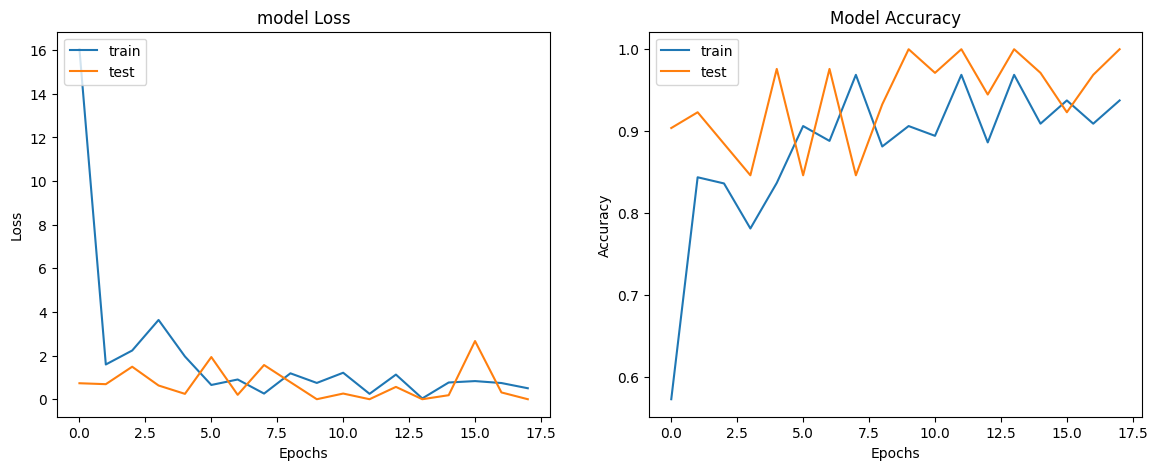

In [34]:
# visualization of training
def plot_res(history): #
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.show()

plot_res(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


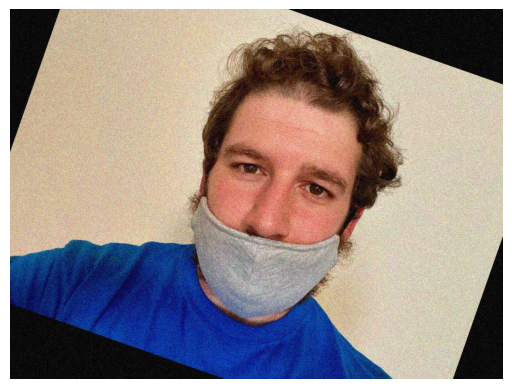

Prediction probabilities: [[1.0000000e+00 1.4928529e-21 7.2039150e-23]]
mask


In [46]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Normalisasi gambar
    
    prediction = vgg16_model.predict(img)
    
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.show()
    
    print("Prediction probabilities:", prediction)
    
    # Interpretasi hasil prediksi
    class_idx = np.argmax(prediction, axis=1)[0]
    
    if class_idx == 0:
        print('mask')
    elif class_idx == 1:
        print('no mask')
    else:
        print('incorrect mask')

# Contoh penggunaan
predict_image('data/input/aug_12.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
This image most likely belongs to incorrect mask with a 57.57 percent confidence.


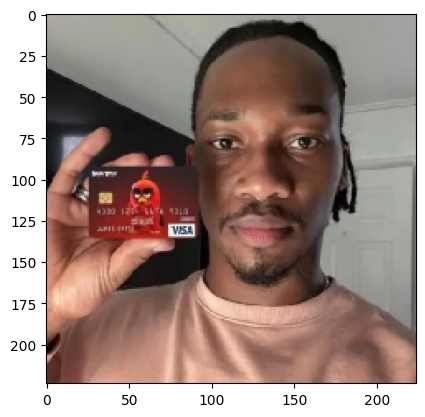

In [10]:
# using the model
# using the model to predict
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# pick input image
img_path = 'data/input/amba.jpg'
# img_path = 'data/input/ilustrasi-anak-anjing_43.jpeg'

# load image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0 # convert image to np array and normalize
img_array = np.expand_dims(img_array, axis=0)

masker = "mask"
unmasker = "no mask"
incorrect = "incorrect mask"

# predict
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# print result
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(
        masker if np.argmax(score) == 0 else unmasker if np.argmax(score) == 1 else incorrect,
        100 * np.max(score)
    )
)

# show image
plt.imshow(img)
plt.show()